In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [57]:
def linear_detector_hough(img):
    imgsize = img.shape
    ThetaDim = 90
    DistStep = 1
    MaxDist = np.sqrt(imgsize[0]**2 + imgsize[1]**2)
    
    DistDim = int(np.ceil(MaxDist/DistStep))
    
    halfThetaWindowSize = 2
    halfDistWindowSize = int(DistDim/50)
    accumulator = np.zeros((ThetaDim,DistDim))
    
    sinTheta = [np.sin(t*np.pi/ThetaDim) for t in range(ThetaDim)]
    cosTheta = [np.cos(t*np.pi/ThetaDim) for t in range(ThetaDim)]
    
    for i in range(imgsize[0]):
        for j in range(imgsize[1]):
            if not edge[i,j] == 0:
                for k in range(ThetaDim):
                    accumulator[k][int(round((i*cosTheta[k]+j*sinTheta[k])*DistDim/MaxDist))] += 1

    M = accumulator.max()

    threshold = int(M*3/10)
    result = np.array(np.where(accumulator > threshold)) # 阈值化
    temp = [[],[]]
    for i in range(result.shape[1]):
        eight_neiborhood = accumulator[max(0, result[0,i] - halfThetaWindowSize + 1):min(result[0,i] + halfThetaWindowSize, accumulator.shape[0]), max(0, result[1,i] - halfDistWindowSize + 1):min(result[1,i] + halfDistWindowSize, accumulator.shape[1])]
        if (accumulator[result[0,i],result[1,i]] >= eight_neiborhood).all():
            temp[0].append(result[0,i])
            temp[1].append(result[1,i])

    result = np.array(temp)    # 非极大值抑制

    result = result.astype(np.float64)
    result[0] = result[0]*np.pi/ThetaDim
    result[1] = result[1]*MaxDist/DistDim

    return result
    

In [3]:
def drawLines(lines,edge,color = (255,0,0),err = 3):
    if len(edge.shape) == 2:
        result = np.dstack((edge,edge,edge))
    else:
        result = edge
    Cos = np.cos(lines[0])
    Sin = np.sin(lines[0])

    for i in range(edge.shape[0]):
        for j in range(edge.shape[1]):
            e = np.abs(lines[1] - i*Cos - j*Sin)
            if (e < err).any():
                result[i,j] = color

    return result

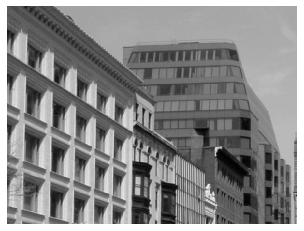

In [115]:
img = cv2.imread('IMG_building.jpg',0)
blurred = cv2.GaussianBlur(img, (3, 3), 0)
plt.imshow(blurred,cmap='gray')
plt.axis('off')
plt.show()

In [120]:
edge = cv2.Canny(img, 200, 230)

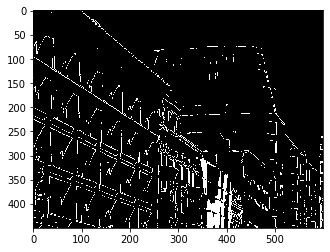

In [121]:
plt.imshow(edge,cmap='gray')

In [100]:
lines = linear_detector_hough(edge)

In [101]:
final_img = drawLines(lines,blurred)

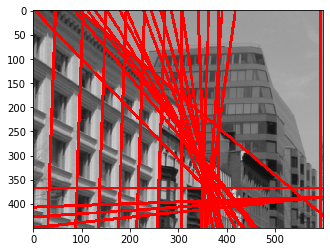

In [102]:
plt.imshow(final_img,cmap='gray')